In [50]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

df_co2 = pd.read_csv("data/CO2.csv") #ppm
df_ch4 = pd.read_csv("data/CH4.csv") #ppb
df_n2o = pd.read_csv("data/N2O.csv") #ppb

df_tmp = pd.read_csv("data/temperature.csv", sep=";")

#### Data preprocessing - gases

In [51]:
# 1. Leave only rows where date is greather than 2000 year
df_co2 = df_co2[(df_co2['year'] > 2000) & (df_co2['year'] < 2023)]
df_ch4 = df_ch4[(df_ch4['year'] > 2000) & (df_ch4['year'] < 2023)]
df_n2o = df_n2o[(df_n2o['year'] > 2000) & (df_n2o['year'] < 2023)]

In [52]:
# 2. Leave only columns with gas concentration and date
df_co2 = df_co2[['year','month','average']]
df_ch4 = df_ch4[['year','month','average']]
df_n2o = df_n2o[['year','month','average']]

In [53]:
# 3. Drop NaN values
df_co2 = df_co2.dropna()
df_ch4 = df_ch4.dropna()
df_n2o = df_n2o.dropna()

In [54]:
# 4. Reset indexing
df_co2 = df_co2.reset_index(drop=True)
df_ch4 = df_ch4.reset_index(drop=True)
df_n2o = df_n2o.reset_index(drop=True)

In [55]:
# 5. Calculate mean of every year
df_co2 = df_co2.groupby('year')['average'].mean().reset_index()
df_ch4 = df_ch4.groupby('year')['average'].mean().reset_index()
df_n2o = df_n2o.groupby('year')['average'].mean().reset_index()

#### Data preprocesing - temperature

In [56]:
# 1. Leave only data from above 2000 year
df_tmp = df_tmp[(df_tmp['Year'] > 2000)]

Text(0.5, 1.0, 'Global temperature- anomaly')

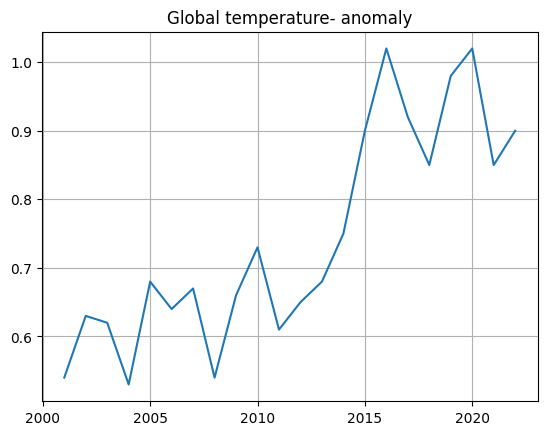

In [57]:
plt.plot(df_tmp['Year'], df_tmp['Anomaly'])
plt.grid()
plt.title("Global temperature- anomaly")

Text(0.5, 1.0, 'Global CO2 concatenation in atmosphere')

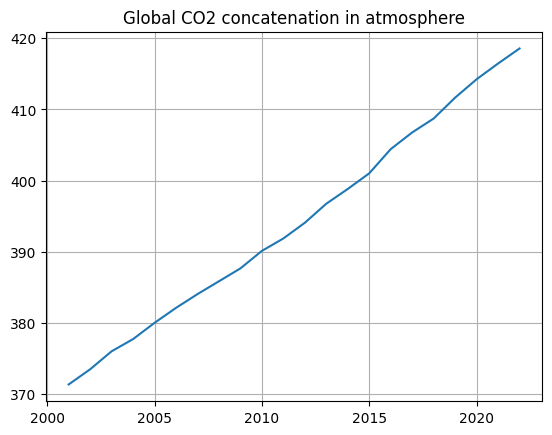

In [61]:
plt.plot( df_co2['year'],df_co2['average'])
plt.grid()
plt.title("Global CO2 concatenation in atmosphere")

In [59]:
df_tmp.tail()

,Year,Anomaly
138,2018,0.85
139,2019,0.98
140,2020,1.02
141,2021,0.85
142,2022,0.90


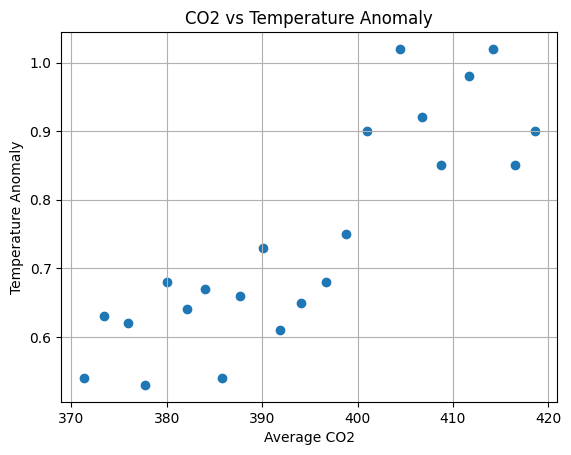

In [63]:
plt.scatter(df_co2['average'], df_tmp['Anomaly'])
plt.xlabel('Average CO2')
plt.ylabel('Temperature Anomaly')
plt.title('CO2 vs Temperature Anomaly')
plt.grid()
plt.show()